## Training a neural networt to recognize patterns in a 9-pixel picture

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adagrad, Adam, RMSprop, SGD
from keras_visualizer import visualizer 

#### Function to draw 9-pixel pictures

In [7]:
def draw_examples(examples, captions=None):
    '''Takes argument: examples and shows is as plot. Captions to every plot are optional '''
    plt.figure(figsize=(16, 4))
    m = len(examples)
    for i, example in enumerate(examples):
        plt.subplot(100 + m * 10 + i + 1)
        plt.imshow(example, cmap=plt.get_cmap('gray'))
    plt.show()
    if captions is not None:
        print(6 * ' ' + (10 * ' ').join(str(captions[i]) for i in range(m)))

#### Function that will generate examples for solid, vertical, diagonal and horizontal patterns in a picture

In [8]:
def generate_example(description):
    variant = random.choice([1, 0, -1]) # There are three choices possible
    if description == 's':  # solid
        return (variant * np.array([[ 1.0,  1.0, 1.0], [ 1.0,  1.0, 1.0], [ 1.0,  1.0, 1.0]]))
    elif description == 'v':  # vertical
        if variant == 1:
            return (np.array([[ 1.0, -1.0, 1.0], [ 1.0, -1.0, 1.0],[ 1.0, -1.0, 1.0]]))
        elif variant == 0:
            return (np.array([[ 1.0, 1.0, -1.0], [ 1.0, 1.0, -1.0],[ 1.0, 1.0, -1.0]]))
        else:
            return (np.array([[ -1.0, 1.0, 1.0], [ -1.0, 1.0, 1.0], [-1.0, 1.0, 1.0]]))
    elif description == 'd':  # diagonal
        if variant == 0: # Diagonal lines have only two options to be drawn, so 
            variant = random.choice([1, -1])
        if variant == 1:
            return (np.array([[ -1.0, 1.0, 1.0], [ 1.0, -1.0, 1.0],[ 1.0, 1.0, -1.0]]))
        else:
            return (np.array([[ 1.0, 1.0, -1.0], [ 1.0, -1.0, 1.0], [-1.0, 1.0, 1.0]]))
    elif description == 'h':  # horizontal
        if variant == 1:
            return (np.array([[ -1.0, -1.0, -1.0], [ 1.0, 1.0, 1.0],[ 1.0, 1.0, 1.0]]))
        elif variant == 0:
            return (np.array([[ 1.0, 1.0, 1.0], [ -1.0, -1.0, -1.0],[ 1.0, 1.0, 1.0]]))
        else:
            return (np.array([[ 1.0, 1.0, 1.0], [ 1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]]))
    else:
        return np.array([[random.uniform(-1, 1), random.uniform(-1, 1)],
                         [random.uniform(-1, 1), random.uniform(-1, 1)],
                         [random.uniform(-1, 1), random.uniform(-1, 1)]])

#### Let's create train and test sets.

In [9]:
import random

num_classes = 4

trainset_size = 4000
testset_size = 1000

y4_train = np.array([random.choice(['s', 'v', 'd', 'h']) for i in range(trainset_size)])
x4_train = np.array([generate_example(desc) for desc in y4_train])

y4_test = np.array([random.choice(['s', 'v', 'd', 'h']) for i in range(testset_size)])
x4_test = np.array([generate_example(desc) for desc in y4_test])

#### An example of 9-pixel pictures and patterns for them

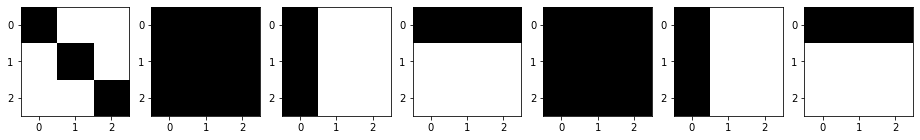

      d          s          v          h          s          v          h


In [5]:
draw_examples(x4_train[:7], captions=y4_train)

#### Reshape train and test sets so they can be an input

In [6]:
x4_train = x4_train.reshape(trainset_size, 9)
x4_test = x4_test.reshape(testset_size, 9)
x4_train = x4_train.astype('float32')
x4_test = x4_test.astype('float32')

y4_train = np.array([{'s': 0, 'v': 1, 'd': 2, 'h': 3}[desc] for desc in y4_train])
y4_test = np.array([{'s': 0, 'v': 1, 'd': 2, 'h': 3}[desc] for desc in y4_test])

y4_train = keras.utils.to_categorical(y4_train, num_classes)
y4_test = keras.utils.to_categorical(y4_test, num_classes)

## The main function that bulids, trains the model and fits the data.
Arguments:
<ul>
<li>neurons_activation: any number of tuples: (number of neurons in a layer, activation function)</li>
<li>num_class: the number of ouput neurons (in this case it is 4 as there are solid, diagonal, vertical and horizontal patterns)</li>
<li>set_rand_weights: if True it will set random weights to one on the layers</li>
<li>weight_layer: choose one layer that will have random weights</li>
</ul>

In [7]:
def create_model(*neurons_activation,num_class=4, set_rand_weights=False,weight_layer=None):
    '''Key function that creates models and trains them. Can add any number of layers.'''
    global model
    model = Sequential()
    for number, (neurons, activation) in enumerate(neurons_activation):
        if number == 0:
            model.add(Dense(neurons, activation=activation, input_shape=(9,)))
        elif number == len(neurons_activation) - 1:
            model.add(Dense(num_class, activation=activation))
        else:
            model.add(Dense(neurons, activation=activation))

    model.compile(loss='categorical_crossentropy',
                    optimizer=keras.optimizers.RMSprop(),
                    metrics=['accuracy'])
    model.summary()
    model.fit(x4_train, y4_train, epochs=8, validation_data=(x4_test, y4_test))

    # Add random weight
    if set_rand_weights:
        assert weight_layer <= len(neurons_activation)
        shape_weight = model.layers[weight_layer].get_weights()[0].shape
        global narray
        narray = np.random.rand(*shape_weight)
        zeros = np.zeros(shape_weight[1])
        model.layers[weight_layer].set_weights([narray, zeros])

## First instance: standard model
4 layers with tanh, tanh, tanh and softmax as activation functions

In [8]:
create_model((9,'tanh'),(4,'tanh'),(8,'tanh'),(5,'softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
125/125 [==============================] - 1s 3ms/step - loss: 1.3187 - accuracy: 0.3842 - val_loss: 1.1735 - val_accuracy: 0.5810
Epoch 2/8
125/125 [==============================] - 0s 1ms/step - loss: 0.9587 - accuracy: 0.6900 - val_loss: 0.77

#### Accuracy is high for the first instance

In [9]:
score = model.evaluate(x4_test, y4_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.00723942881450057
Test accuracy: 1.0


## Second instance: changed models (more neurons and different activation functions)
4 layers with relu, relu, softmax and softmax as activation functions 

In [39]:
create_model((9,'relu'),(10,'relu'),(8,'softmax'),(5,'softmax'))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_25 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 36        
Total params: 314
Trainable params: 314
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
125/125 [==============================] - 1s 2ms/step - loss: 1.3275 - accuracy: 0.4642 - val_loss: 1.2443 - val_accuracy: 0.6940
Epoch 2/8
125/125 [==============================] - 0s 1ms/step - loss: 1.1418 - accuracy: 0.7455 - val_loss: 1.

#### Accuracy is perfect, but test loss is higher than in the first one 

In [40]:
score = model.evaluate(x4_test, y4_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.3035319447517395
Test accuracy: 1.0


## Third instance: more layers!
7 layers with relu, tanh, sigmoid, relu, relu, softmax and softmax as activation functions 

In [41]:
create_model((9,'relu'),(9,'tanh'),(5,'sigmoid'),(5,'relu'),(10,'relu'),(8,'softmax'),(5,'softmax'))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_29 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_34 (Dense)             (None, 4)                

#### Test accuracy is high

In [42]:
score = model.evaluate(x4_test, y4_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.49878063797950745
Test accuracy: 1.0


## Forth instance: random weights
4 layers with tanh, tanh, tanh and softmax as activation functions. Additionaly there are random weights in the first layer

In [56]:
create_model((9,'tanh'),(4,'tanh'),(8,'tanh'),(5,'softmax'), set_rand_weights=True,weight_layer=0)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_44 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
125/125 [==============================] - 1s 5ms/step - loss: 1.1558 - accuracy: 0.5510 - val_loss: 0.9280 - val_accuracy: 0.6940
Epoch 2/8
125/125 [==============================] - 0s 1ms/step - loss: 0.7793 - accuracy: 0.7393 - val_loss: 0

#### Accuracy is very low for this one

In [57]:
score = model.evaluate(x4_test, y4_test, verbose=0)

print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 2.683692693710327
Test accuracy: 0.33399999141693115
